النصوص الأصلية:
                             Text
0  I love Artificial Intelligence
1    AI is transforming the world
2   Data science is very powerful
3             I hate bad datasets


بعد التنظيف:
                             Text                         Cleaned
0  I love Artificial Intelligence  i love artificial intelligence
1    AI is transforming the world    ai is transforming the world
2   Data science is very powerful   data science is very powerful
3             I hate bad datasets             i hate bad datasets


بعد تقسيم الكلمات:
                             Text                         Cleaned  \
0  I love Artificial Intelligence  i love artificial intelligence   
1    AI is transforming the world    ai is transforming the world   
2   Data science is very powerful   data science is very powerful   
3             I hate bad datasets             i hate bad datasets   

                                Tokens  
0  [i, love, artificial, intelligence]  
1   [ai, is, transfo

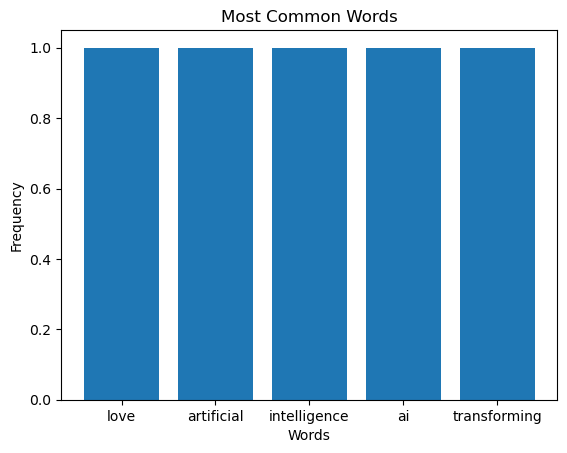

In [6]:
# ====================================
# NLP Lesson 1
# بدون تحميل punkt
# ====================================

import pandas as pd
import regex as re
from collections import Counter
import matplotlib.pyplot as plt

# ============================
# 1️⃣ إنشاء البيانات
# ============================

data = {
    "Text": [
        "I love Artificial Intelligence",
        "AI is transforming the world",
        "Data science is very powerful",
        "I hate bad datasets"
    ]
}

df = pd.DataFrame(data)

print("النصوص الأصلية:")
print(df)
print("\n")


# ============================
# 2️⃣ تنظيف النص
# ============================

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\p{L}\s]', '', text)
    return text

df["Cleaned"] = df["Text"].apply(clean_text)

print("بعد التنظيف:")
print(df)
print("\n")


# ============================
# 3️⃣ Tokenization يدوي (بدون nltk)
# ============================

df["Tokens"] = df["Cleaned"].apply(lambda x: x.split())

print("بعد تقسيم الكلمات:")
print(df)
print("\n")


# ============================
# 4️⃣ إزالة Stopwords يدوياً
# ============================

stop_words = ["i", "is", "the", "very"]

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df["Filtered_Tokens"] = df["Tokens"].apply(remove_stopwords)

print("بعد إزالة كلمات التوقف:")
print(df)
print("\n")


# ============================
# 5️⃣ حساب تكرار الكلمات
# ============================

all_words = []

for tokens in df["Filtered_Tokens"]:
    all_words.extend(tokens)

word_freq = Counter(all_words)

print("تكرار الكلمات:")
print(word_freq)
print("\n")


# ============================
# 6️⃣ رسم بياني
# ============================

common_words = word_freq.most_common(5)

words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure()
plt.bar(words, counts)
plt.title("Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()